Reference https://docs.opencv.org/3.1.0/d3/db4/tutorial_py_watershed.html

In [ ]:
# Sandbox

In [6]:
%matplotlib notebook
import numpy as np
import cv2
import matplotlib.pyplot as plt


<IPython.core.display.Javascript object>


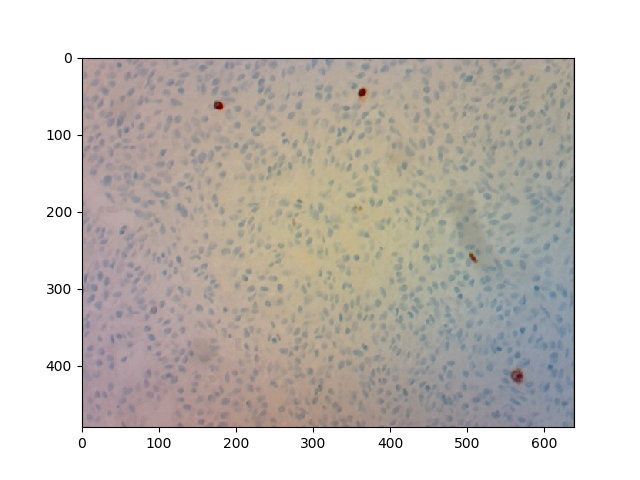

<function matplotlib.pyplot.show(*args, **kw)>

In [15]:
# temporarily override the live captured image with one from file:
original = cv2.imread('topo_med_original.jpg')
#original = cv2.imread('coins.jpg')
#original = cv2.imread('hsv.png')
original_rgb = cv2.cvtColor(original,cv2.COLOR_BGR2RGB)

plt.imshow(original_rgb)
plt.show

## White balance

<IPython.core.display.Javascript object>


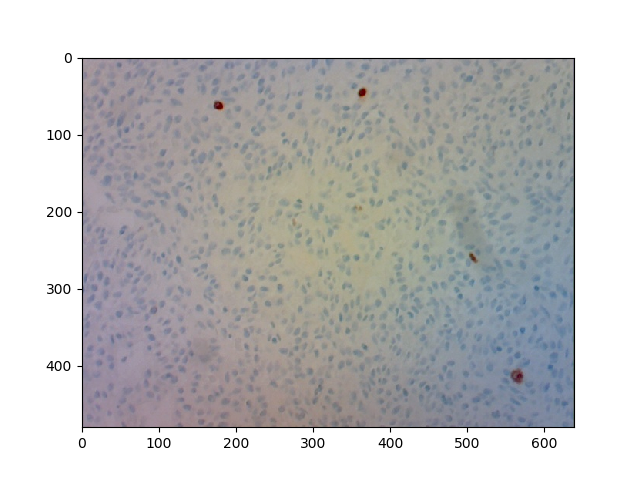

<function matplotlib.pyplot.show(*args, **kw)>

In [23]:
# White balance algorithm

# https://stackoverflow.com/questions/49835662/how-to-use-xphoto-whitebalancer-balancewhite-with-python-and-opencv
    
wb = cv2.xphoto.createGrayworldWB()
wb.setSaturationThreshold(0.9999)
balanced_image = wb.balanceWhite(original)
balanced_rgb = cv2.cvtColor(balanced_image,cv2.COLOR_BGR2RGB)

plt.imshow(balanced_rgb)
plt.show

<IPython.core.display.Javascript object>


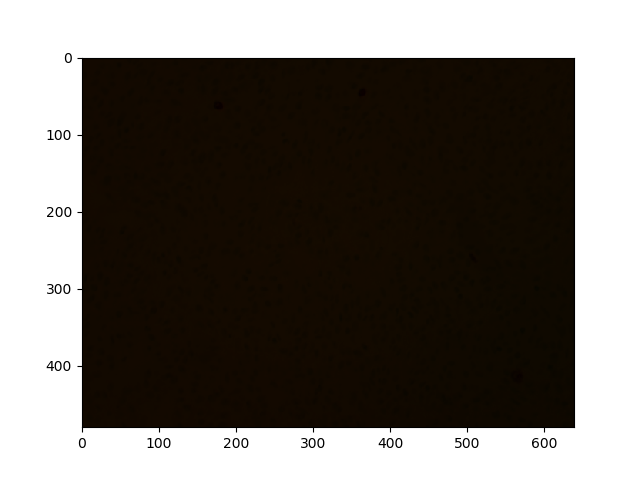

<function matplotlib.pyplot.show(*args, **kw)>

In [17]:
difference = original_rgb - balanced_image

plt.imshow(difference)
plt.show

## Colour filter

<IPython.core.display.Javascript object>


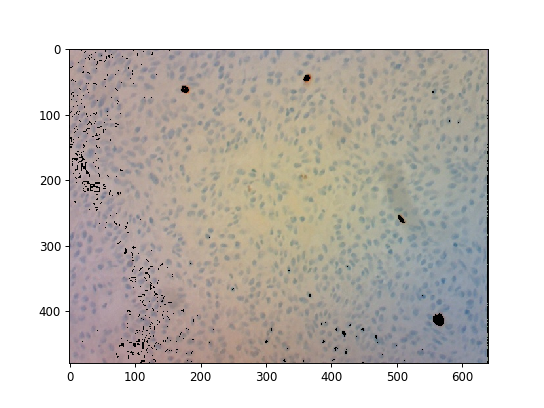

<function matplotlib.pyplot.show(*args, **kw)>

In [240]:
# Filter colours and get all the cells to become more distinct.
# http://www.colorizer.org/

# Hue = rainbow 0-179
# Saturation = white/pale_colour to colour 0-255
# Value = black/dark_colour to colour 0-255
'''
BLUE
h 160 - 253
s 11 - 100
v 42 - 100
'''
hsv = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)
lower_blue = np.array([0,0,130])     #(red->,      white->,   black->)
upper_blue = np.array([178,255,255])    #(->purple,   ->colour,  ->colour)

blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
blue = cv2.bitwise_and(original,original, mask = blue_mask )
#?and back to rgb from bgr

blue_rgb = cv2.cvtColor(blue,cv2.COLOR_BGR2RGB)
plt.imshow(blue_rgb)
plt.show



In [3]:
'''
= 160,11,42 to 253,100,100
BROWN
h 0 to 70
s 0 to 100
v 0 to 100
'''
# Hue = rainbow 0-255
# Saturation = white/pale_colour to colour 0-255
# Value = black/dark_colour to colour 0-255

lower_brown = np.array([0,70,0])          #(red->,      white->,   black->)
upper_brown = np.array([50,255,255])      #(->purple,   ->colour,  ->colour)

brown_mask = cv2.inRange(hsv, lower_brown, upper_brown)
brown = cv2.bitwise_and(original,original, mask = brown_mask )

brown_rgb = cv2.cvtColor(brown,cv2.COLOR_BGR2RGB)

plt.imshow(brown_rgb)
plt.show

NameError: name 'hsv' is not defined

# Preprocessing to make blobs clearer

In [304]:
# Technique 1: 
# The median (edge preseving) blur filter
# The canny edge detection algorithm

median = cv2.medianBlur(original, 5) #must be odd number
edge = cv2.Canny(median,1,25) # how many dots
kernel = np.ones((1,1),np.uint8) # line size
edge = cv2.dilate(edge,kernel,iterations=1)
median[edge==255]=0



plt.imshow(median)
plt.show

# perhaps if you then smooth again, the black from the lines will darken the borders of the blobs

<function matplotlib.pyplot.show(*args, **kw)>

<IPython.core.display.Javascript object>


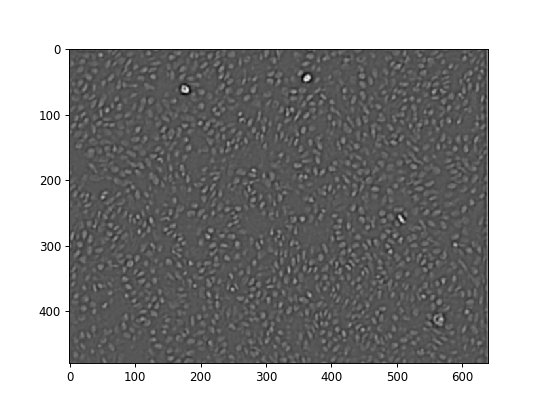

<function matplotlib.pyplot.show(*args, **kw)>

In [365]:
# Next technique is canny alone

canny = cv2.Canny(gray,20,70)


plt.imshow(canny, cmap='gray')
plt.show

<IPython.core.display.Javascript object>


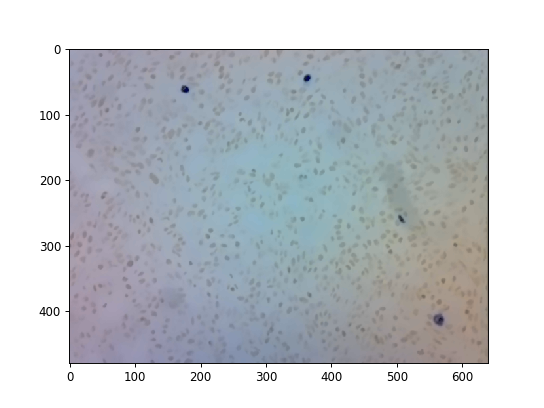

<function matplotlib.pyplot.show(*args, **kw)>

In [322]:
# Next technique: Low pass biltering
# Nonlocal means denoising 

non_local = cv2.fastNlMeansDenoisingColored(original,None,5,20,3,21)


plt.imshow(non_local)
plt.show

<IPython.core.display.Javascript object>


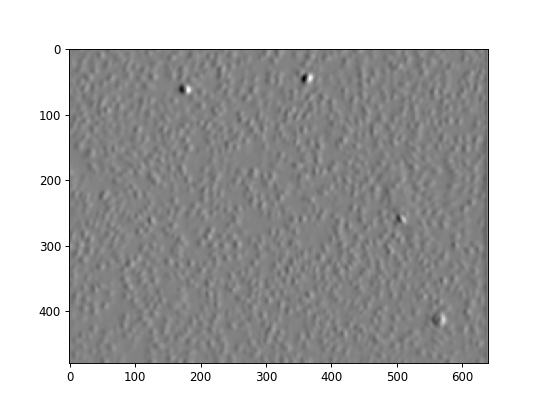

<function matplotlib.pyplot.show(*args, **kw)>

In [381]:
# Next is high-pass edge detection

laplacian = cv2.Laplacian(gray,cv2.CV_64F,ksize=15) # compute second derivative of image
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=31) # on x
sobely = cv2.Sobel(original,cv2.CV_64F,0,1,ksize=5) # on y


plt.imshow(sobelx,cmap = 'gray')
plt.show

<IPython.core.display.Javascript object>


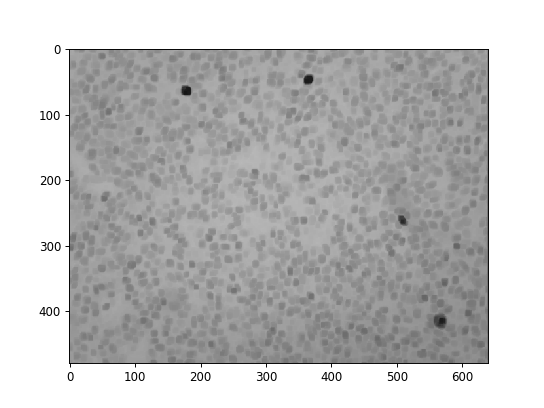

<function matplotlib.pyplot.show(*args, **kw)>

In [417]:
kernel = np.ones((2,2),np.float32)

erosion = cv2.erode(gray,kernel,iterations=4)

erosion_rgb = cv2.cvtColor(erosion,cv2.COLOR_GRAY2RGB)

plt.imshow(erosion_rgb)
plt.show

<IPython.core.display.Javascript object>


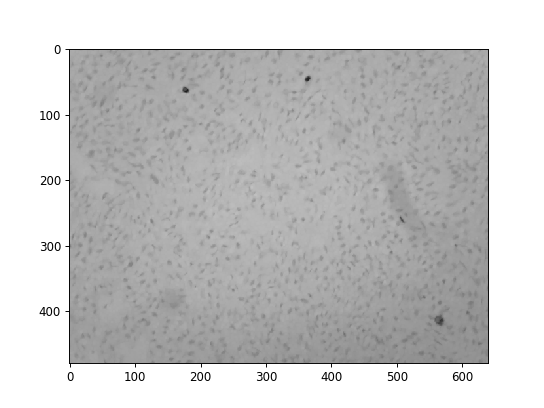

<function matplotlib.pyplot.show(*args, **kw)>

In [426]:
kernel = np.ones((2,2),np.float32)

dilation = cv2.dilate(gray,kernel,iterations=2)

dilation_rgb = cv2.cvtColor(dilation,cv2.COLOR_GRAY2RGB)

plt.imshow(dilation_rgb)
plt.show

<IPython.core.display.Javascript object>


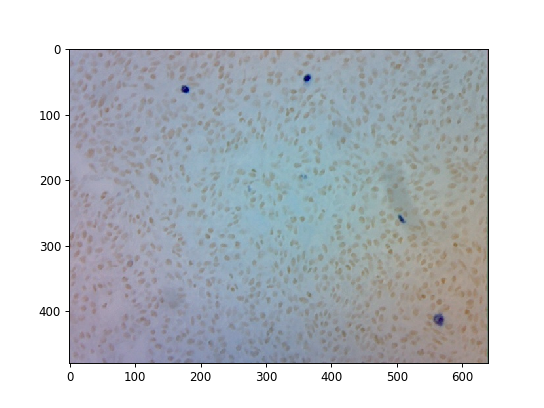

<function matplotlib.pyplot.show(*args, **kw)>

In [443]:


# Floodfill doesn't seem to work 
flood = cv2.floodFill(image = original,mask=None,seedPoint = (176,62),newVal=0)

plt.imshow(flood[1])
plt.show

# Begin Watershed

<IPython.core.display.Javascript object>


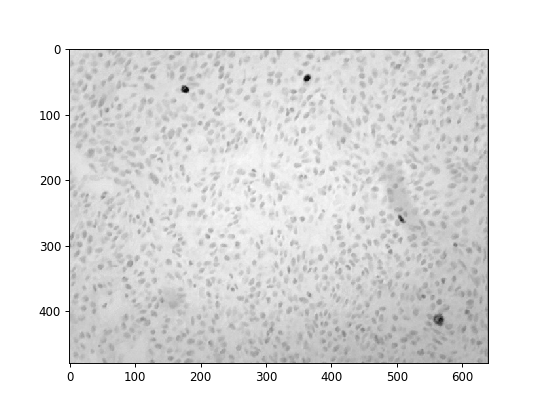

<function matplotlib.pyplot.show(*args, **kw)>

In [249]:
# convert to grey for the watershed algo
#bgr = cv2.cvtColor(brown,cv2.COLOR_HSV2BGR)
gray = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.show

<IPython.core.display.Javascript object>


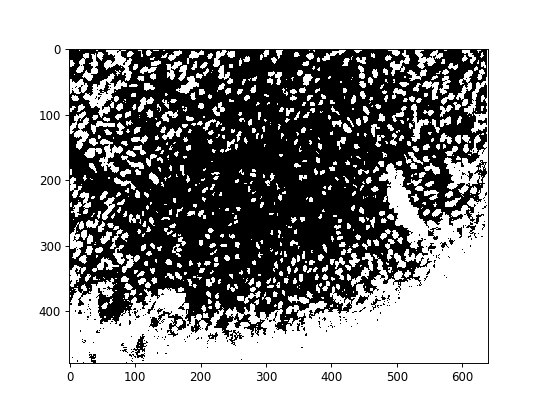

<function matplotlib.pyplot.show(*args, **kw)>

In [382]:

# Ostu's binarisation to get a super rough estimation of cell locations
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.show


<IPython.core.display.Javascript object>


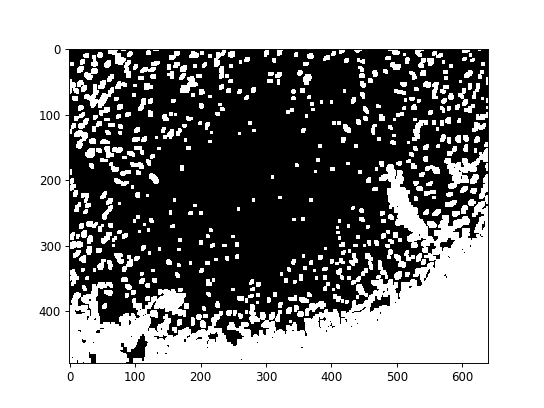

<function matplotlib.pyplot.show(*args, **kw)>

In [388]:
# noise kernel
kernel = np.ones((3,3),np.uint8)    
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

plt.imshow(opening, cmap='gray')
plt.show


<IPython.core.display.Javascript object>


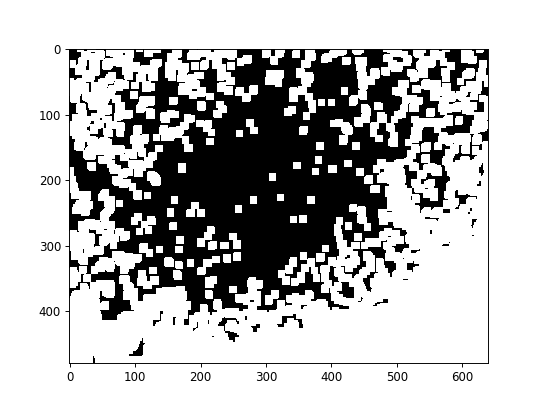

<function matplotlib.pyplot.show(*args, **kw)>

In [389]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

plt.imshow(sure_bg, cmap='gray')
plt.show


<IPython.core.display.Javascript object>


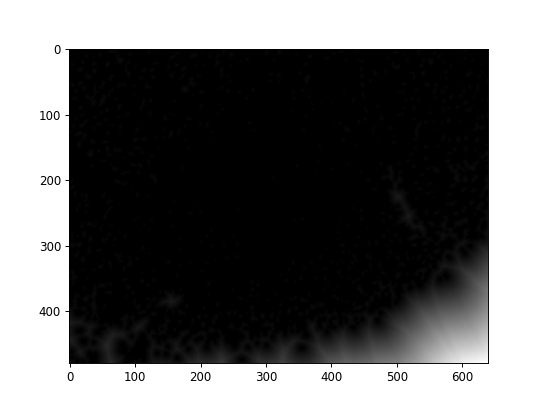

<function matplotlib.pyplot.show(*args, **kw)>

In [390]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) 

plt.imshow(dist_transform, cmap='gray')
plt.show

<IPython.core.display.Javascript object>


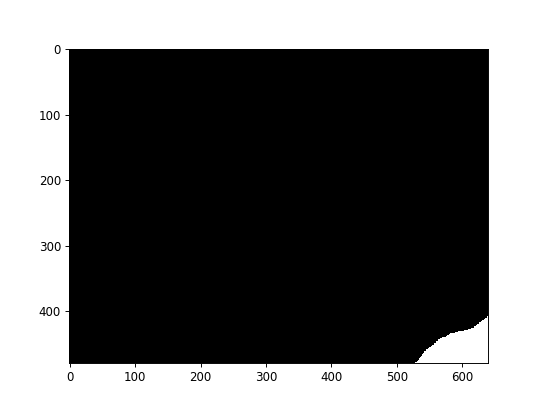

<function matplotlib.pyplot.show(*args, **kw)>

In [391]:
# Finding sure foreground area
  
ret, sure_fg = cv2.threshold(dist_transform,0.6*dist_transform.max(),255,0)

plt.imshow(sure_fg, cmap='gray')
plt.show


<IPython.core.display.Javascript object>


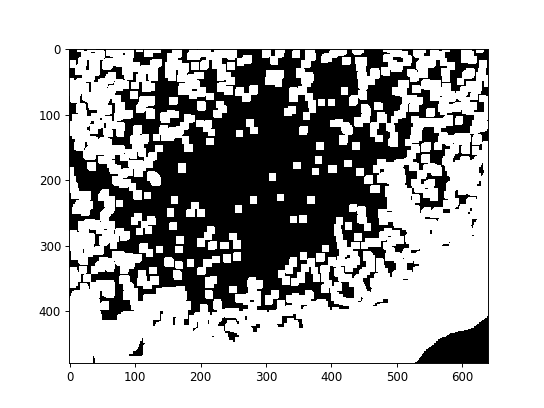

<function matplotlib.pyplot.show(*args, **kw)>

In [392]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)   
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown, cmap='gray')
plt.show

<IPython.core.display.Javascript object>


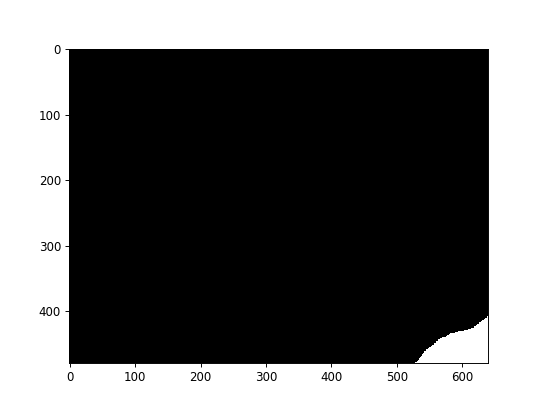

<function matplotlib.pyplot.show(*args, **kw)>

In [393]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers, cmap='gray')
plt.show

In [387]:
# Add one to all labels so that sure background is not 0, but 1    
markers = markers+1

# Now, mark the region of unknown with zero    
markers[unknown==255] = 0

markers = cv2.watershed(original,markers)    
original[markers == -1] = [255,0,0]

plt.imshow(markers, cmap='gray')
plt.show

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\segmentation.cpp:162: error: (-215:Assertion failed) src.size() == dst.size() in function 'cv::watershed'
